# Data Preprocessing Template

## Importing the libraries

In [62]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly_express as px
import plotly.graph_objects as go


## Importing the dataset

In [63]:
conditions = {
    "calve": "1",
    "knorr": "2",
    "lipton": "3",
    "LİPTON": "3",
    "omo": "4",
    "rinso": "5",  
    "yumos": "6",
    "yumoş": "6",  
    "signal": "7",
    "SİGNAL": "7",
    "white": "7",  
    "şampuan": "8",
    "dove": "9",
    "elidor": "10",
    "ELİDOR": "10",
    "clear": "11",
    "domestos": "12",
    "vim": "13",
    "cif": "14",
    "CİF": "14",
    "yüzey": "15",
    "rexona": "16",
    "axe": "17",
    "lux": "18",  
    "pure": "19",  
    "VASELİNE": "20" 
}

def value_to_condition(value):
    for k, v in conditions.items():
        if str(value) == str(v):
            return k
    return None



In [64]:
dataset = pd.read_excel("vm_dataset.xlsx")
dataset.head(6)

,KOD,BARKOD,MAMUL,K.İÇİ,GR,LİSTE,FATURA ALTI %,DÖNEM SONU %,KDV,NET MALİYET,Ö.RAF,KATEGORİ,AY
0,67293883,8690637840746,1,8,400.0,21.85,12.0,5,0.01,18.449266,23.061583,FOOD,MART
1,67293891,8690637840821,1,8,400.0,21.85,12.0,5,0.01,18.449266,23.061583,FOOD,MART
2,67767533,8690637905896,1,12,600.0,27.00,13.0,5,0.01,22.538655,28.173319,FOOD,MART
3,67754288,8690637905193,1,12,600.0,27.00,13.0,5,0.01,22.538655,28.173319,FOOD,MART
4,68612788,8690637999277,1,8,335.0,39.75,10.0,5,0.01,34.326113,42.907641,FOOD,MART
5,67101470,8690637805233,1,12,245.0,29.30,22.0,5,0.01,21.928413,27.410516,FOOD,MART


In [65]:
dataset.iloc[:,[2,3,4,9]].describe().T

,count,mean,std,min,25%,50%,75%,max
MAMUL,3820.0,8.129843,5.195764,1.00000,3.000000,9.000000,12.000000,17.000000
K.İÇİ,3820.0,31.806021,42.070992,1.00000,12.000000,16.000000,24.000000,288.000000
GR,3820.0,495.057774,860.757657,1.90000,68.750000,165.000000,500.000000,7500.000000
NET MALİYET,3820.0,46.938735,29.326755,1.17059,22.038788,45.302022,64.333334,250.486418


In [66]:
dataset["MARKA"] = dataset["MAMUL"].apply(value_to_condition)

dataset.head(3)

,KOD,BARKOD,MAMUL,K.İÇİ,GR,LİSTE,FATURA ALTI %,DÖNEM SONU %,KDV,NET MALİYET,Ö.RAF,KATEGORİ,AY,MARKA
0,67293883,8690637840746,1,8,400.0,21.85,12.0,5,0.01,18.449266,23.061583,FOOD,MART,calve
1,67293891,8690637840821,1,8,400.0,21.85,12.0,5,0.01,18.449266,23.061583,FOOD,MART,calve
2,67767533,8690637905896,1,12,600.0,27.00,13.0,5,0.01,22.538655,28.173319,FOOD,MART,calve


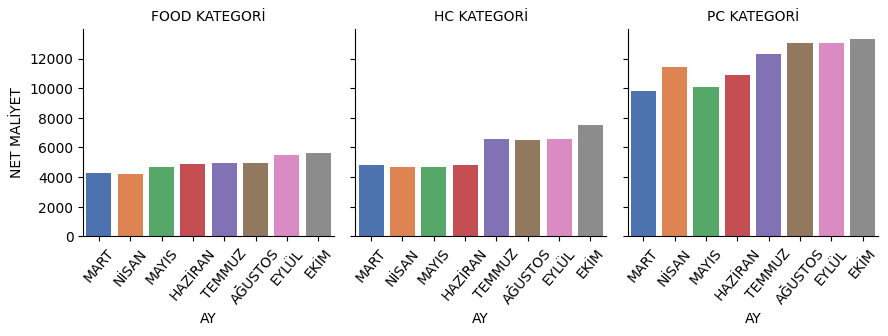

In [67]:
g = sns.FacetGrid(data=dataset , col="KATEGORİ")
g.map(sns.barplot, "AY", "NET MALİYET", order=dataset["AY"].unique(),
      palette="deep", errorbar=None, estimator=np.sum, orient="v", saturation=1).set_xticklabels(rotation=50).set_titles("{col_name} {col_var}")


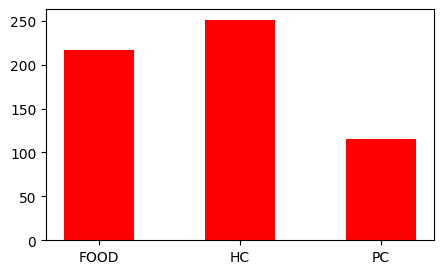

In [68]:
fig = plt.figure(figsize=(5,3))
plt.bar(dataset["KATEGORİ"], dataset["NET MALİYET"], color="red", width=0.5)
plt.show()

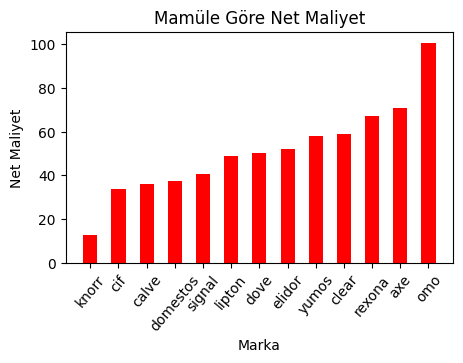

MARKA
knorr        12.963883
cif          33.923931
calve        35.999938
domestos     37.479303
signal       40.662069
lipton       48.901012
dove         50.072112
elidor       52.220736
yumos        58.228264
clear        59.069377
rexona       67.264627
axe          70.852899
omo         100.574117
Name: NET MALİYET, dtype: float64

In [94]:
fig = plt.figure(figsize=(5,3))
# net maliyeti ortalamasına göre sırala
ort = dataset.groupby("MARKA")["NET MALİYET"].mean().sort_values(ascending=True)

plt.bar(x=ort.index, height=ort.values, color="red", width=0.5) # type: ignore
plt.title("Mamüle Göre Net Maliyet")
plt.xticks(rotation=50)
plt.xlabel("Marka")
plt.ylabel("Net Maliyet")
plt.show()
ort

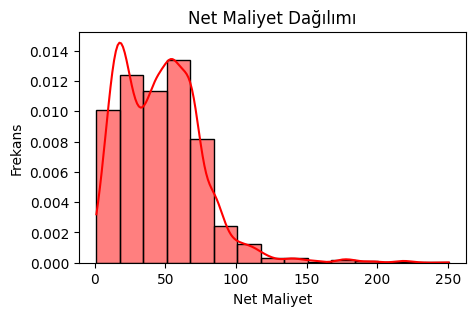

In [70]:
fig = plt.figure(figsize=(5,3))
sns.histplot(dataset["NET MALİYET"], color="red", bins=15, kde=True, stat="density")
plt.title("Net Maliyet Dağılımı")
plt.xlabel("Net Maliyet")
plt.ylabel("Frekans")
plt.show()

<AxesSubplot: xlabel='KATEGORİ', ylabel='NET MALİYET'>

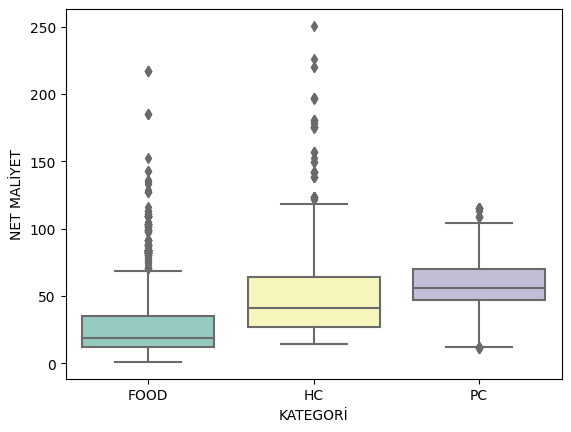

In [71]:
sns.boxplot(x=dataset["KATEGORİ"], y=dataset["NET MALİYET"], palette="Set3")

In [72]:
dataset.head(3)

,KOD,BARKOD,MAMUL,K.İÇİ,GR,LİSTE,FATURA ALTI %,DÖNEM SONU %,KDV,NET MALİYET,Ö.RAF,KATEGORİ,AY,MARKA
0,67293883,8690637840746,1,8,400.0,21.85,12.0,5,0.01,18.449266,23.061583,FOOD,MART,calve
1,67293891,8690637840821,1,8,400.0,21.85,12.0,5,0.01,18.449266,23.061583,FOOD,MART,calve
2,67767533,8690637905896,1,12,600.0,27.00,13.0,5,0.01,22.538655,28.173319,FOOD,MART,calve


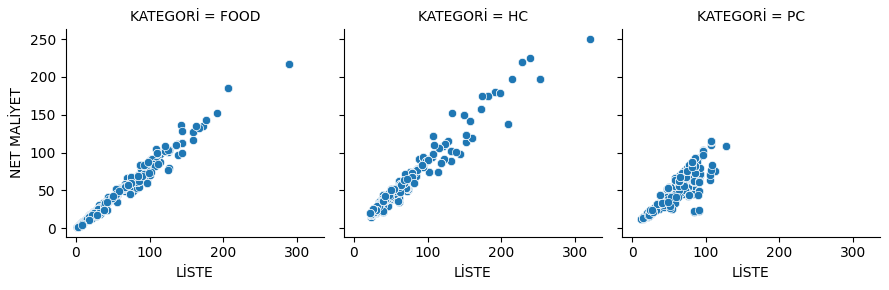

In [73]:
g = sns.FacetGrid(data=dataset , col="KATEGORİ")
g.map(sns.scatterplot, "LİSTE", "NET MALİYET")